# User's Guide, Chapter 43: Searching in and Among Scores

In [1]:
lamb1 = corpus.parse('palestrina/agnus_I_01', forceSource=True)

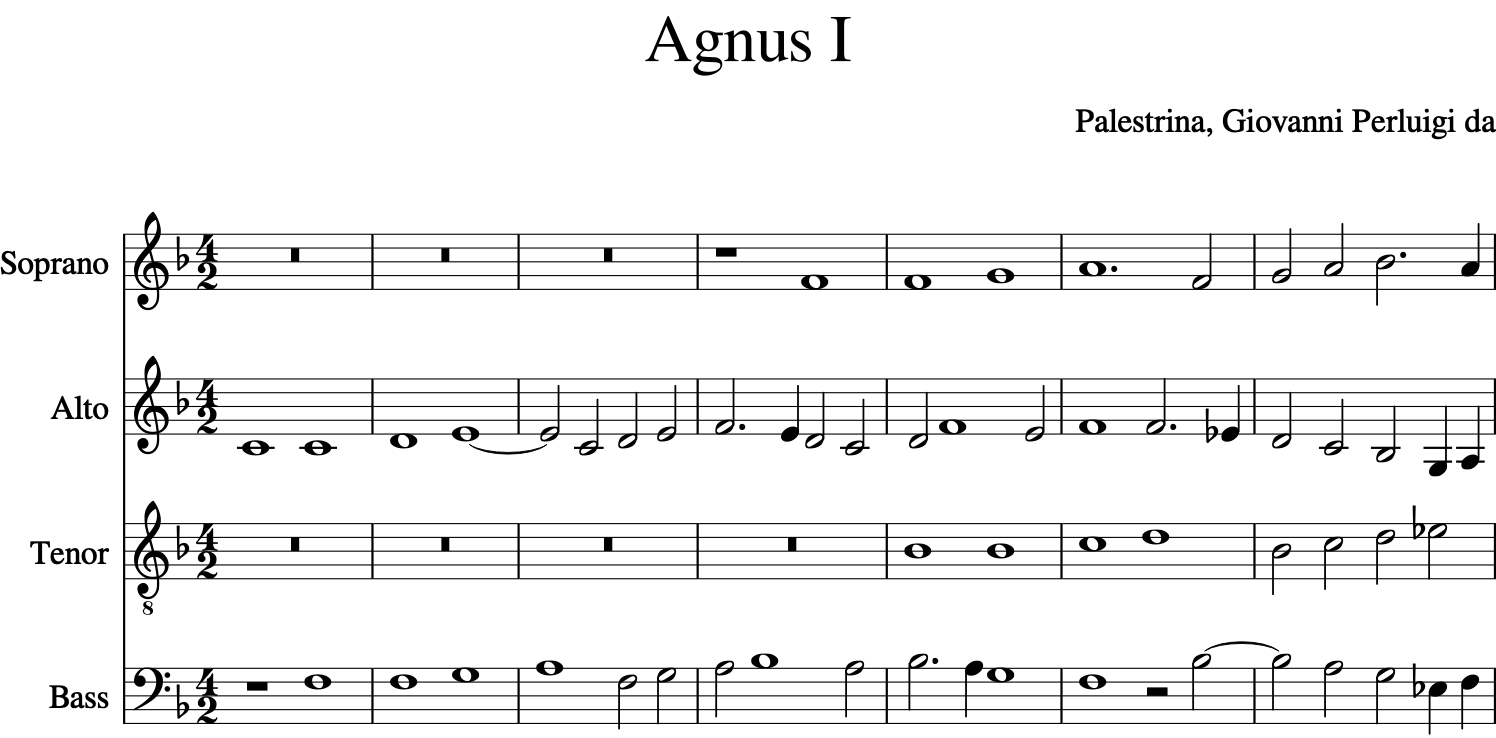

In [2]:
lamb1.measures(0, 7).show()

Nice Stretto going from the beginning!  Okay, let's search for some things...

Let's find all instances of three whole notes in a row...

In [3]:
justTheNotes = lamb1.recurse().notes
searchList = [note.Note(type='whole'), note.Note(type='whole'), note.Note(type='whole')]

search.rhythmicSearch(justTheNotes,
                      searchList)

[0, 107, 108, 189, 216, 217, 243, 251, 302, 303, 324]

In [4]:
secondEntry = justTheNotes[107]
secondEntry

<music21.note.Note C>

In [5]:
secondEntry.getContextByClass('Part')

<music21.stream.Part spine_2>

In [6]:
secondEntry.measureNumber

1

In [7]:
secondEntry.beat

1.0

In [8]:
lamb2 = lamb1.stripTies()

In [9]:
justTheNotes = lamb2.recurse().notes
search.rhythmicSearch(justTheNotes,
                      searchList)

[0, 102, 207, 208, 232, 240, 241, 287, 288, 298]

In [10]:
thirdEntry = justTheNotes[207]

In [11]:
p = thirdEntry.getContextByClass('Part')

In [12]:
p.recurse().getElementsByClass('Instrument')[0]

<music21.instrument.Tenor 'Tenor'>

In [13]:
entryPoints = search.rhythmicSearch(justTheNotes, searchList)

In [14]:
for notePosition in entryPoints:
    startingNote = justTheNotes[notePosition]
    startingMeasure = startingNote.measureNumber
    startingBeat = startingNote.beat
    startingPart = startingNote.getContextByClass('Part')
    startingInstrument = startingPart.recurse().getElementsByClass('Instrument')[0]
    print(startingNote, startingMeasure, startingBeat, startingInstrument)

<music21.note.Note F> 4 3.0 Soprano
<music21.note.Note C> 1 1.0 Alto
<music21.note.Note B-> 5 1.0 Tenor
<music21.note.Note B-> 5 3.0 Tenor
<music21.note.Note G> 12 3.0 Tenor
<music21.note.Note B-> 18 1.0 Tenor
<music21.note.Note C> 18 3.0 Tenor
<music21.note.Note F> 1 3.0 Bass
<music21.note.Note F> 2 1.0 Bass
<music21.note.Note G> 5 3.0 Bass


In [15]:
searchStream2 = stream.Stream([key.KeySignature(-1),
                               note.Note('C', type='whole'), 
                               note.Note('C', type='whole'), 
                               note.Note('D', type='whole')])
justTheNotes = lamb2.recurse().notes

transposeInterval = interval.GenericInterval(2)

for unused in range(12): # unison to seventh
    searchStream2.transpose(transposeInterval, inPlace=True)
    # here is the compact way of doing the same thing:
    # useSearchList = [n.transpose(transposeInterval) for n in searchList2]
    entryPoints = search.noteNameRhythmicSearch(justTheNotes, searchStream2.notes)
    print('Searching for ' + str(searchStream2.notes[0]))
    for notePosition in entryPoints:
        startingNote = justTheNotes[notePosition]
        startingMeasure = startingNote.measureNumber
        startingBeat = startingNote.beat
        startingPart = startingNote.getContextByClass('Part')
        startingInstrument = startingPart.recurse().getElementsByClass('Instrument')[0]
        print(startingNote, startingMeasure, startingBeat, startingInstrument)

Searching for <music21.note.Note D>
Searching for <music21.note.Note E>
Searching for <music21.note.Note F>
<music21.note.Note F> 4 3.0 Soprano
<music21.note.Note F> 1 3.0 Bass
Searching for <music21.note.Note G>
Searching for <music21.note.Note A>
Searching for <music21.note.Note B->
<music21.note.Note B-> 5 1.0 Tenor
Searching for <music21.note.Note C>
<music21.note.Note C> 1 1.0 Alto
Searching for <music21.note.Note D>
Searching for <music21.note.Note E>
Searching for <music21.note.Note F>
<music21.note.Note F> 4 3.0 Soprano
<music21.note.Note F> 1 3.0 Bass
Searching for <music21.note.Note G>
Searching for <music21.note.Note A>


## Advanced Topics: Writing your own algorithm

Let's say that you want to compare notes by pitchClass and not by name, we don't have an algorithm for that, but it's pretty easy to write your own and use `search.streamSearchBase` to implement it.

The algorithm should check to see if two notes have the same pitchClass and return `True` if they do:

In [16]:
def pitchClassEqual(n1, n2):
    if n1.pitch.pitchClass == n2.pitch.pitchClass:
        return True
    else:
        return False

Now we can run a search on something with this algorithm:

In [17]:
s = converter.parse('tinyNotation: 5/4 b4 c d# e f b# e- f-').recurse().notes
searchList = [note.Note('C'), note.Note('E-'), note.Note('E')]

search.streamSearchBase(s, searchList, algorithm=pitchClassEqual)


[1, 5]

But if you really want to search on pitch classes, see `search.serial`